# Telecom Churn Case Study

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os
from sklearn.linear_model import LogisticRegression
# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',None)
# setting styles for seaborn
sns.set(style='whitegrid', palette='deep', font_scale=1.5, color_codes=True,context='paper')

In [3]:
data=pd.read_csv('telecom_churn_data.csv')

### Data Understanding

In [4]:
data.shape

(99999, 226)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
#let us check if any categorical variables present
print(data.select_dtypes(include='object').columns)

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


### Data Cleaning

In [9]:
#check for null count
null=data.columns[data.isna().any()].tolist()
print(data[null].isnull().sum())

loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
loc_og_t2t_mou_7         3859
loc_og_t2t_mou_8         5378
loc_og_t2t_mou_9         7745
loc_og_t2m_mou_6         3937
loc_og_t2m_mou_7         3859
loc_og_t2m_mou_8         5378
loc_og_t2m_mou_9         7745
                        ...  
max_rech_data_8         73660
max_rech_data_9         74077
count_rech

In [10]:
#null count of categorical 
data.select_dtypes('object').isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [11]:
#drop date value columns as they are insignificant
data.drop(data.select_dtypes(['object']), inplace=True, axis=1)

In [12]:
len(data.columns[data.isna().any()].tolist())

155

In [13]:
## Removing columns containing unnecessary data

In [14]:
data.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,10

In [15]:
#since the first 4 columns are not hvaing no vaiance, removing them
data_cleaned=data.drop(data.columns[1:5], axis=1)
data_cleaned.head(2)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.2,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18

In [16]:
#Getting columns which have more than 30% null values and which doesnt corresponding to toal
lstCols =[];
for colName in data_cleaned.columns:
    if ((round(100*(data_cleaned[colName].isnull().sum()/len(data_cleaned.index)), 2)>30) 
        & (colName.find('total')==-1) 
        & (colName.find('av_rech')==-1)) :
        lstCols.append(colName);
print(lstCols)

['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [17]:
data_cleaned = data_cleaned.drop(lstCols,axis=1)

In [18]:
#filling 0 for all remaining nan values
data_cleaned = data_cleaned.fillna(0)

In [19]:
#removing columns regarding incoming and ougoing as we have to total column
lstCols = data_cleaned.columns[(data_cleaned.columns.str.contains('roam_'))
                                |(data_cleaned.columns.str.contains('loc_'))
                                |(data_cleaned.columns.str.contains('std_'))
                                |(data_cleaned.columns.str.contains('isd_'))
                                |(data_cleaned.columns.str.contains('spl_'))
                                |(data_cleaned.columns.str.contains('_others_'))                                
                               ]
lstCols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [20]:
data_cleaned= data_cleaned.drop(lstCols,axis=1)

In [21]:
data_cleaned.head(2)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.2,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,40.31,178.53,312.44,72.11,26.83,104.23,423.28,188.04,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,1.0,2.0,0.0,0.0,154.0,50.0,0.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.0,0.00


In [22]:
data_cleaned.shape

(99999, 74)

### Derive new features

In [23]:
data_cleaned['arpu_gp'] = (data_cleaned['arpu_6'] + data_cleaned['arpu_7'])/2
data_cleaned['onnet_mou_gp'] = (data_cleaned['onnet_mou_6'] + data_cleaned['onnet_mou_7'])/2
data_cleaned['offnet_mou_gp'] = (data_cleaned['offnet_mou_6'] + data_cleaned['offnet_mou_7'])/2

data_cleaned['total_rech_num_gp'] = (data_cleaned['total_rech_num_6'] + data_cleaned['total_rech_num_7'])/2

data_cleaned['vol_2g_gp'] = (data_cleaned['vol_2g_mb_6'] + data_cleaned['vol_2g_mb_7'])/2
data_cleaned['vol_3g_gp'] = (data_cleaned['vol_3g_mb_6'] + data_cleaned['vol_3g_mb_7'])/2

data_cleaned['monthly_2g_gp'] = (data_cleaned['monthly_2g_6'] + data_cleaned['monthly_2g_7'])/2
data_cleaned['monthly_3g_gp'] = (data_cleaned['monthly_3g_6'] + data_cleaned['monthly_3g_7'])/2
data_cleaned['sachet_2g_gp'] = (data_cleaned['sachet_2g_6'] + data_cleaned['sachet_2g_7'])/2                                                                        
data_cleaned['sachet_3g_gp'] = (data_cleaned['sachet_3g_6'] + data_cleaned['sachet_3g_7'])/2  
data_cleaned['vbc_3g_gp'] = (data_cleaned['jul_vbc_3g'] + data_cleaned['jun_vbc_3g'])/2

In [24]:
# remove the columns of _6 and _7 for which we created new features

data_cleaned.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','total_rech_num_6',
'total_rech_num_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7',
'monthly_2g_6','monthly_2g_7','monthly_3g_6','monthly_3g_7','sachet_2g_6','sachet_2g_7',
'sachet_3g_6','sachet_3g_7','jul_vbc_3g','jun_vbc_3g'],inplace=True, axis=1)


In [25]:
data_cleaned.shape

(99999, 63)

### Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [26]:
data_cleaned['tot_rech_amt_gp']=data_cleaned['total_rech_amt_6']+data_cleaned['total_rech_amt_7']
data_cleaned['tot_rech_data_gp_6']=data_cleaned['av_rech_amt_data_6']*data_cleaned['total_rech_data_6']
data_cleaned['tot_rech_data_gp_7']=data_cleaned['av_rech_amt_data_7']*data_cleaned['total_rech_data_7']
data_cleaned['tot_rech_data_gp']=data_cleaned['tot_rech_data_gp_6']+data_cleaned['tot_rech_data_gp_7']

In [27]:
data_cleaned['tot_rech_gp']=(data_cleaned['tot_rech_amt_gp']+data_cleaned['tot_rech_data_gp'])

In [28]:
data_cleaned.head()

,mobile_number,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_8,monthly_2g_9,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,sep_vbc_3g,arpu_gp,onnet_mou_gp,offnet_mou_gp,total_rech_num_gp,vol_2g_gp,vol_3g_gp,monthly_2g_gp,monthly_3g_gp,sachet_2g_gp,sachet_3g_gp,vbc_3g_gp,tot_rech_amt_gp,tot_rech_data_gp_6,tot_rech_data_gp_7,tot_rech_data_gp,tot_rech_gp
0,7000842753,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,5.75,0.0,109.61,0.00,0,0,0,0,1,0,0,0,968,30.4,3.58,206.1005,0.000,0.00,3.5,15.725,117.165,0.0,1.0,0.0,0.0,50.600,614,252.0,252.0,504.0,1118.0
1,7001865778,268.321,86.285,7.68,18.34,304.76,53.76,40.31,178.53,312.44,72.11,26.83,104.23,423.28,188.04,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,1.0,2.0,0.0,0.0,154.0,50.0,0.0,365.47,0.0,0.00,0.00,0,0,2,0,0,0,0,0,1006,0.0,0.00,194.5605,51.395,57.79,6.5,54.035,0.000,0.5,0.0,0.0,0.0,0.000,458,0.0,154.0,154.0,612.0
2,7001625959,210.226,290.714,37.26,74.81,208.36,118.91,155.33,412.94,285.46,124.94,370.04,519.53,395.03,517.74,2,7,168,315,116,358,86,200,86,100,0,200,86,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.00,0.0,0.00,8.42,0,0,0,1,0,0,0,0,1103,0.0,0.00,178.3740,33.390,181.96,4.5,0.000,0.000,0.0,0.0,0.0,0.0,2.085,483,0.0,0.0,0.0,483.0
3,7001204172,508.054,389.500,310.98,241.71,71.68,113.54,223.23,135.31,352.21,362.54,280.08,216.61,53.13,305.38,18,14,230,310,601,410,60,50,50,50,30,50,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,2491,0.0,0.00,236.2200,77.150,116.16,10.5,0.000,0.000,0.0,0.0,0.0,0.0,0.000,540,0.0,0.0,0.0,540.0
4,7000142493,238.174,163.426,83.89,58.78,124.26,45.81,127.28,241.33,208.16,104.59,216.44,198.29,338.81,205.31,3,4,196,350,287,200,56,110,110,50,50,110,110,50,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,1526,0.0,0.00,285.7560,99.875,84.42,5.5,0.000,0.000,0.0,0.0,0.5,0.0,0.000,546,56.0,0.0,56.0,602.0


In [29]:
#calculating 70th percentile of total_rech_amt_good_phase 
cutOffValue = data_cleaned['tot_rech_gp'].quantile(0.7)
cutOffValue

956.0

In [30]:
#filtering high valued customers based on cutoff value
df = data_cleaned.loc[data_cleaned['tot_rech_gp']>=cutOffValue]

In [31]:
#store customer data and remove the 'mobile_number' column
customers=df['mobile_number']
df=df.drop('mobile_number',axis=1)

In [32]:
df.shape

(30001, 67)

### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [33]:
def churnfunc(row):
    if row['total_ic_mou_9'] > 0 or row['total_og_mou_9'] > 0 or row['vol_2g_mb_9'] > 0 or row['vol_3g_mb_9'] > 0:
        val = 0
    else:
        val = 1
    return val

In [34]:
df['churn'] = df.apply(churnfunc, axis=1)

In [35]:
#check if the churn have been correctly identified
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].sort_values(by='churn', ascending=False)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
62707,0.00,0.00,0.00,0.00,1
62618,0.00,0.00,0.00,0.00,1
40942,0.00,0.00,0.00,0.00,1
87734,0.00,0.00,0.00,0.00,1
87717,0.00,0.00,0.00,0.00,1
62653,0.00,0.00,0.00,0.00,1
40855,0.00,0.00,0.00,0.00,1
13289,0.00,0.00,0.00,0.00,1
13301,0.00,0.00,0.00,0.00,1


In [36]:
#remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
df= df[df.columns.drop(list(df.filter(regex='_9')))]

In [37]:
df.shape

(30001, 51)

In [38]:
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,sep_vbc_3g,arpu_gp,onnet_mou_gp,offnet_mou_gp,total_rech_num_gp,vol_2g_gp,vol_3g_gp,monthly_2g_gp,monthly_3g_gp,sachet_2g_gp,sachet_3g_gp,vbc_3g_gp,tot_rech_amt_gp,tot_rech_data_gp_6,tot_rech_data_gp_7,tot_rech_data_gp,tot_rech_gp,churn
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,5.75,109.61,0,0,1,0,968,30.40,3.58,206.1005,0.00,0.000,3.5,15.725,117.165,0.0,1.0,0.0,0.0,50.600,614,252.0,252.0,504.0,1118.0,1
7,3171.480,52.29,325.91,487.53,609.24,350.16,626.46,558.04,428.74,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,0.00,1209.5150,56.26,510.295,5.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060,2370,0.0,0.0,0.0,2370.0,1
8,137.362,35.08,136.48,508.36,431.66,171.56,103.86,28.49,16.54,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.03,11.94,0,3,0,0,315,21.03,0.00,435.4720,382.36,87.645,20.0,178.000,375.475,0.5,0.0,0.5,0.0,516.405,1038,0.0,354.0,354.0,1392.0,0
21,637.760,85.14,983.39,860.34,1028.79,1068.54,207.09,131.89,261.04,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,556.1030,117.26,827.305,24.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,1280,0.0,0.0,0.0,1280.0,0
23,366.966,33.58,205.89,134.38,140.04,239.48,119.58,222.89,298.33,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,0.00,134.1235,49.81,87.385,4.0,0.240,299.545,0.0,1.0,0.0,0.0,25.930,454,0.0,712.0,712.0,1166.0,0


In [39]:
# check for any columns with unique value
df.nunique().sort_values()

churn                     2
monthly_2g_8              6
monthly_2g_gp             9
monthly_3g_8             12
monthly_3g_gp            20
sachet_3g_8              29
sachet_2g_8              34
total_rech_data_6        38
sachet_3g_gp             42
total_rech_data_7        43
total_rech_data_8        47
sachet_2g_gp             55
total_rech_num_8         96
last_day_rch_amt_7      152
last_day_rch_amt_6      157
max_rech_amt_7          161
total_rech_num_gp       169
max_rech_amt_6          172
last_day_rch_amt_8      181
max_rech_amt_8          182
av_rech_amt_data_6      871
av_rech_amt_data_8      908
av_rech_amt_data_7      937
tot_rech_data_gp_6     1642
tot_rech_data_gp_7     1746
total_rech_amt_6       2298
total_rech_amt_8       2305
total_rech_amt_7       2316
sep_vbc_3g             2635
aon                    3294
tot_rech_amt_gp        3659
tot_rech_data_gp       3865
tot_rech_gp            5183
aug_vbc_3g             9840
vol_3g_mb_8           10115
vol_2g_mb_8         

In [40]:
#check for class imbalance
round((df['churn'].sum()/len(df.index)*100),2)

8.14

We have only 8.14% customers tagged as churned. Therefore presence of class imbalance.

### EDA and Data visualization

In [41]:
cor=df.corr()

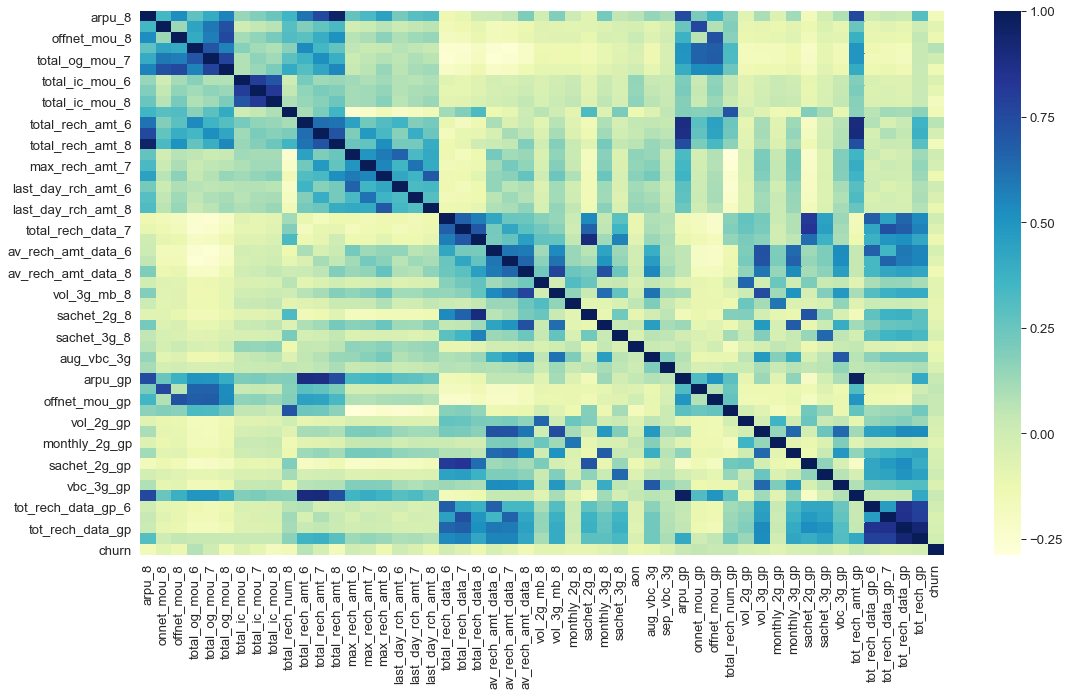

In [42]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

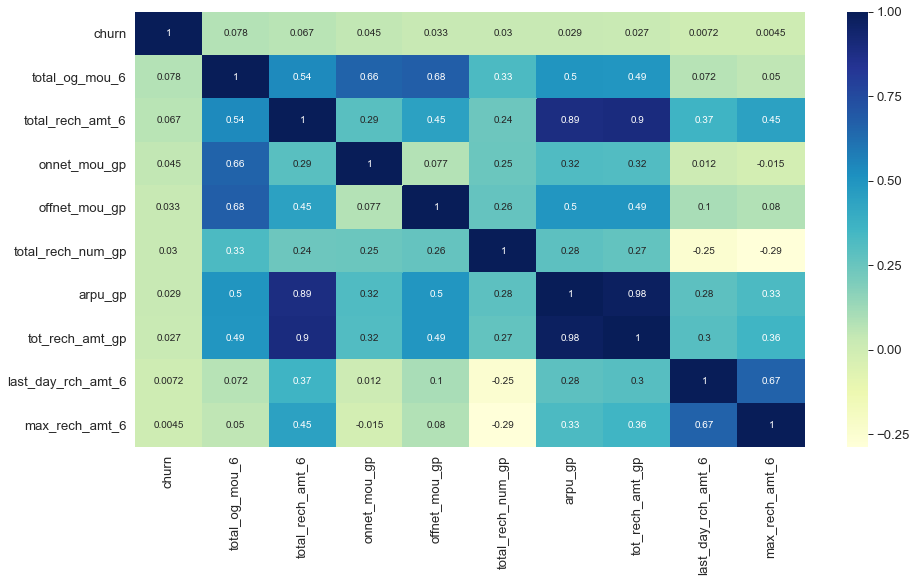

In [43]:
#Choosing the top 10 variables with high correlation
cols = cor.nlargest(10, 'churn')['churn'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(15,8))
sns.heatmap(cm, cmap="YlGnBu", annot=True,yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We have high correlation in data

In [44]:
lstFeatures=['arpu_8','total_og_mou_8','total_og_mou_8','total_ic_mou_8','total_rech_amt_8']

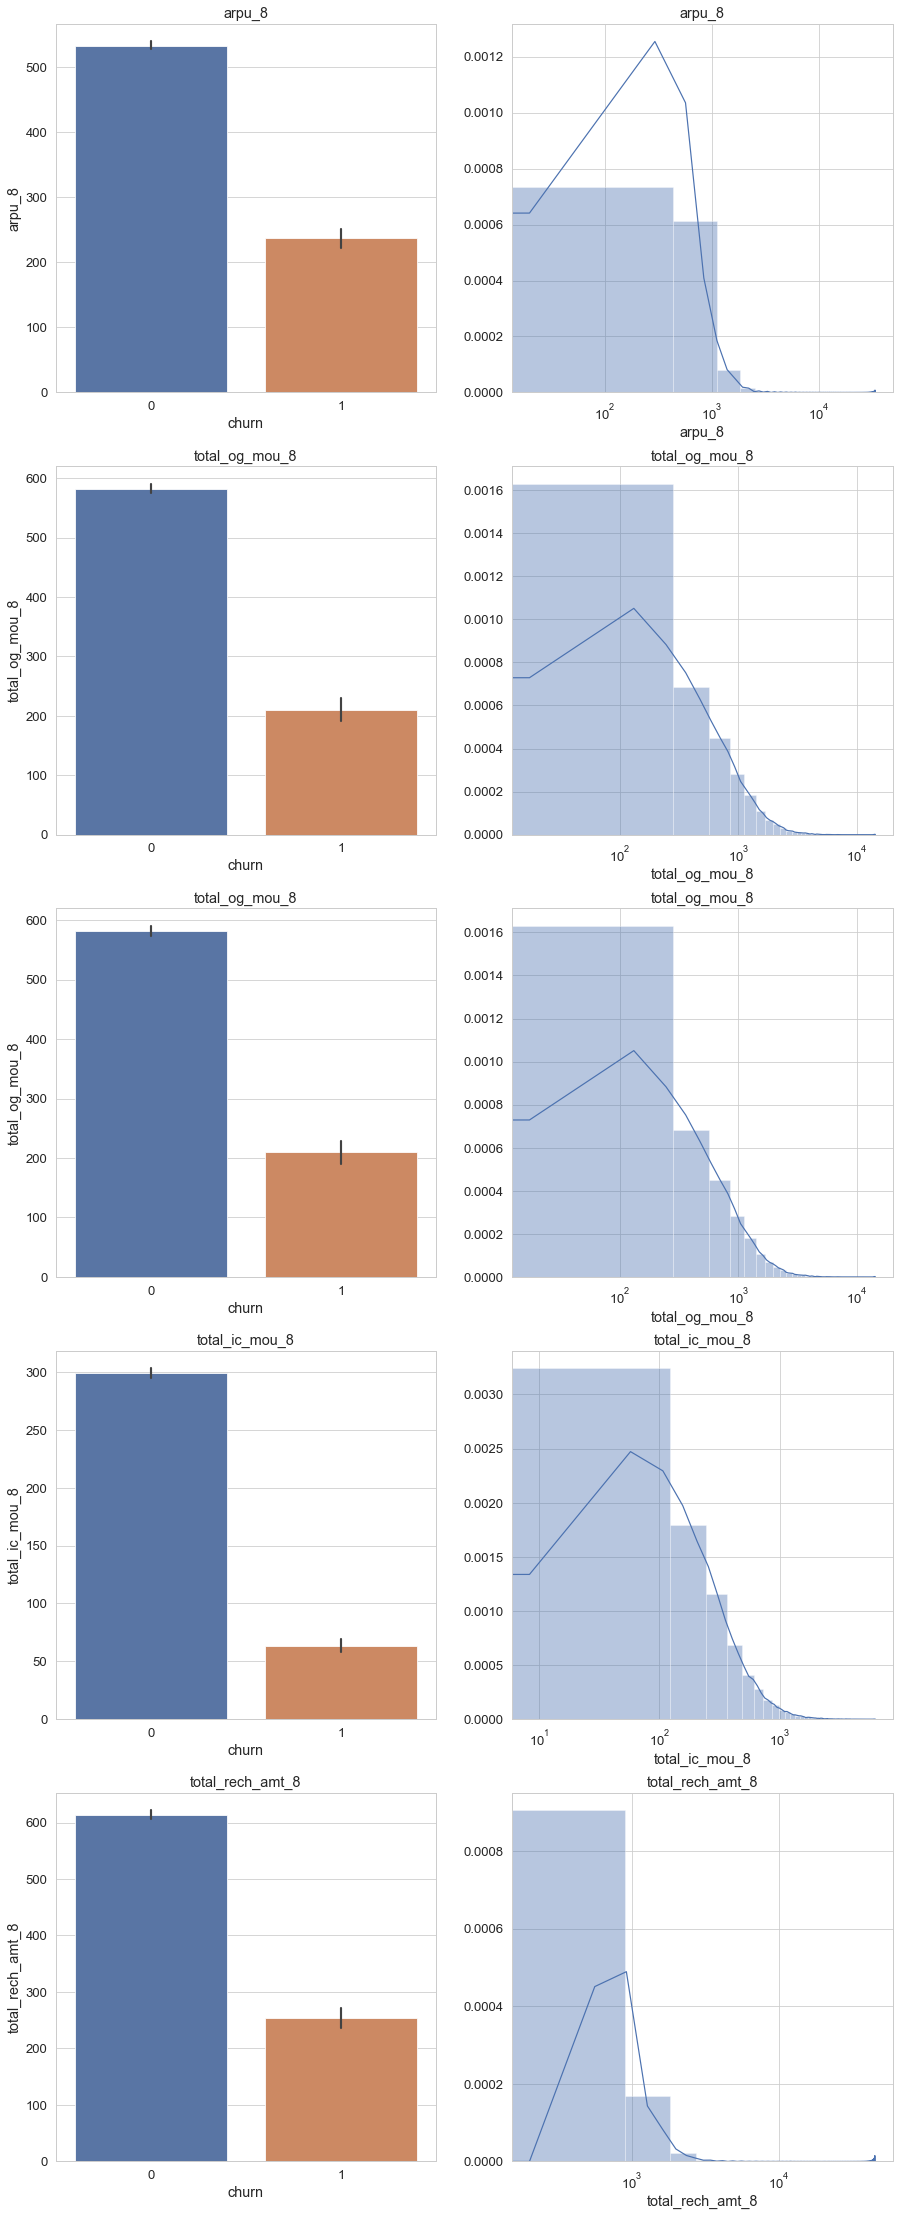

In [45]:
plt.figure(figsize=(15, 80))
i=1;
for x in lstFeatures:
    plt.subplot(10,2,i)
    plt.title(x)
    sns.barplot(x=df['churn'], y=df[x])
    i=i+1;    
    plt.subplot(10,2,i)
    plt.title(x)
    sns.distplot(df[x])
    plt.xscale('log')
    i=i+1;
plt.show()

### Model Building

### Models to predict churn

In [46]:
#Splitting Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['churn'],axis=1)

# Putting response variable to y
y = df['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

### Scaling

In [47]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'arpu_gp',
       'onnet_mou_gp', 'offnet_mou_gp', 'total_rech_num_gp', 'vol_2g_gp',
       'vol_3g_gp', 'monthly_2g_gp', 'monthly_3g_gp', 'sachet_2g_gp',
       'sachet_3g_gp', 'vbc_3g_gp', 'tot_rech_amt_gp', 'tot_rech_data_gp_6',
       'tot_rech_data_gp_7', 'tot_rech_data_gp', 'tot_rech_gp'],
      dtype='object')

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [49]:
X_train.shape

(21000, 50)

### PCA

In [50]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [51]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

Let's plot the principal components and try to make sense of them
We'll plot original features on the first 2 principal components as axes

In [52]:
pca.components_

array([[ 2.22490053e-01,  1.46734436e-01,  1.88327057e-01, ...,
        -1.49714367e-01, -1.62257189e-01, -5.43051894e-02],
       [ 1.97066088e-01,  1.04373555e-02,  4.57608096e-02, ...,
         2.09799270e-01,  2.18308317e-01,  2.72200960e-01],
       [ 6.74069976e-02,  1.33422339e-01,  1.09947996e-01, ...,
         1.29385056e-01,  1.33719959e-01,  1.46076722e-01],
       ...,
       [-0.00000000e+00, -1.87066612e-17,  8.97821966e-18, ...,
         1.05697717e-01, -3.59587157e-01,  1.99885635e-01],
       [-0.00000000e+00,  1.20755806e-16, -1.16973842e-16, ...,
        -2.62128019e-01,  6.28819131e-01, -2.07248592e-01],
       [ 0.00000000e+00,  1.40634558e-16,  6.48064736e-17, ...,
        -3.28368537e-01,  2.41013908e-01,  3.40136634e-01]])

In [53]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.222490,0.197066,arpu_8
1,0.146734,0.010437,onnet_mou_8
2,0.188327,0.045761,offnet_mou_8
3,0.210264,0.006182,total_og_mou_6
4,0.230369,0.015157,total_og_mou_7
5,0.219086,0.035341,total_og_mou_8
6,0.082454,0.034458,total_ic_mou_6
7,0.090666,0.044130,total_ic_mou_7
8,0.089392,0.050256,total_ic_mou_8
9,0.044955,0.039965,total_rech_num_8


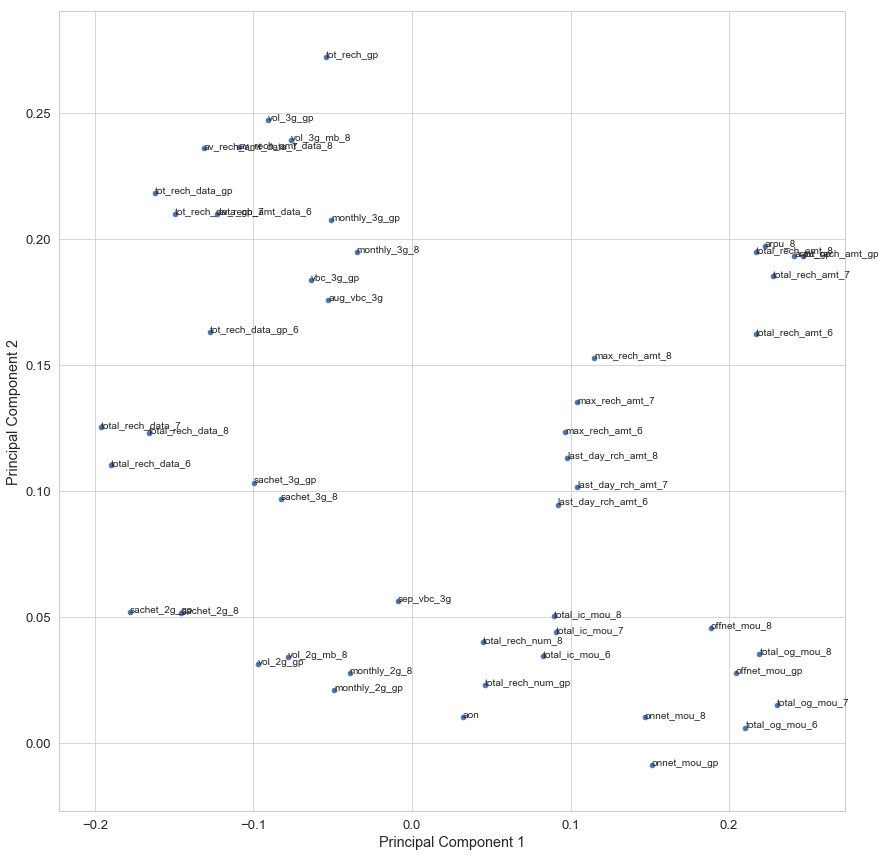

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (12,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Looking at the screeplot to assess the number of needed principal components

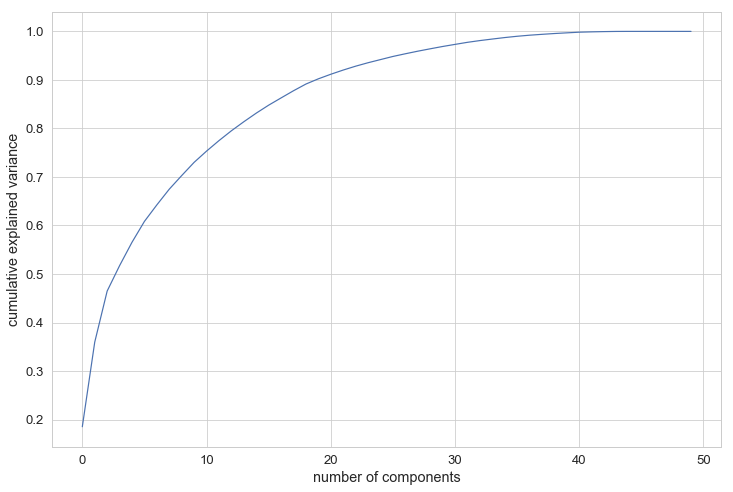

In [55]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 25 components are enough to describe 95% of the variance in the dataset
We'll choose 25 components for our modeling

In [56]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

Basis transformation - getting the data onto our PCs

In [57]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(21000, 25)

Creating correlation matrix for the principal components - we expect little to no correlation

In [58]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

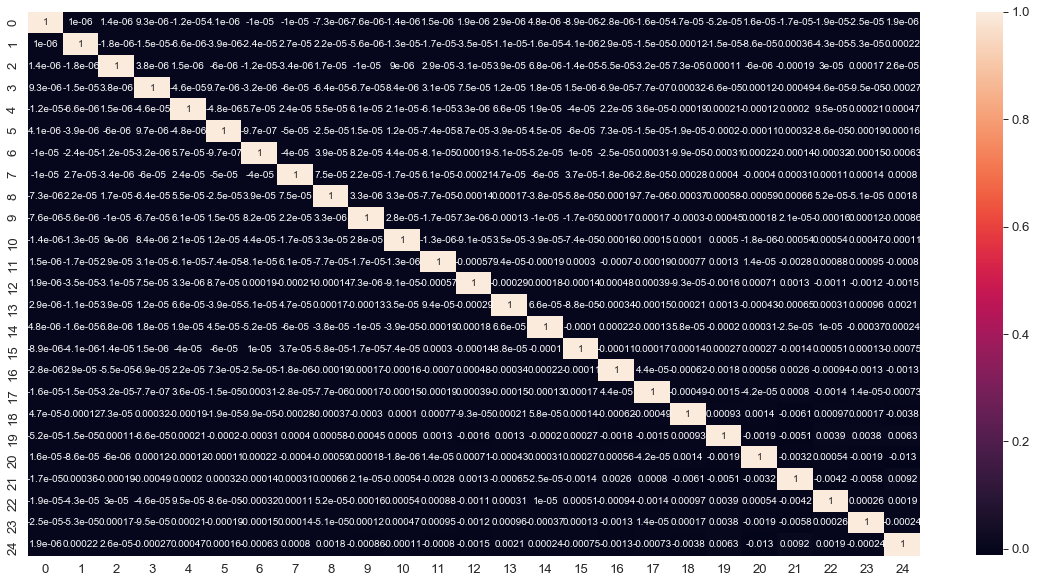

In [59]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot=True)
plt.show()

In [60]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009207285354445182 , min corr:  -0.012619722702135055


There is no correlation between any two components
We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [61]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 25)

### Logistic Regression

In [62]:
# Logistic Regression
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,recall_score,precision_score

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_pca, y_train)

predictions = logreg.predict(X_test_pca)


In [63]:
print(classification_report(y_test,predictions))
lr_acc=accuracy_score(y_test,predictions)
lr_recall=recall_score(y_test,predictions)
print("Accuracy score is : {}".format( accuracy_score(y_test,predictions)))
print("Recall is : {}".format(recall_score(y_test,predictions)))
print("Precision is : {}".format(precision_score(y_test,predictions)))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      8251
           1       0.26      0.82      0.40       750

   micro avg       0.79      0.79      0.79      9001
   macro avg       0.62      0.81      0.64      9001
weighted avg       0.92      0.79      0.84      9001

Accuracy score is : 0.7932451949783358
Recall is : 0.82
Precision is : 0.26270824434002565


### Random forest

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [64]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

In [66]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [67]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [68]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,predictions))
print("Accuracy score is : {}".format( accuracy_score(y_test,predictions)))
print("Recall is : {}".format(recall_score(y_test,predictions)))
print("Precision is : {}".format(precision_score(y_test,predictions)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8251
           1       0.62      0.18      0.28       750

   micro avg       0.92      0.92      0.92      9001
   macro avg       0.77      0.59      0.62      9001
weighted avg       0.90      0.92      0.90      9001

Accuracy score is : 0.9225641595378291
Recall is : 0.184
Precision is : 0.6188340807174888


In [69]:
## Grid Search to Find Optimal Hyperparameters

#We can now find the optimal hyperparameters using GridSearchCV.

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  9.6min finished


We can get accuracy of 0.8780476190476191 using {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [70]:
##**Fitting the final model with the best parameters obtained from grid search.**

In [74]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=200,
                            class_weight={0:0.1, 1: 0.9})

# fit
rfc.fit(X_train_pca,y_train)

# predict
predictions = rfc.predict(X_test_pca)

print(classification_report(y_test,predictions))
rf_acc=accuracy_score(y_test,predictions)
rf_recall=recall_score(y_test,predictions)
print("Accuracy score is : {}".format( accuracy_score(y_test,predictions)))
print("Recall is : {}".format(recall_score(y_test,predictions)))
print("Precision is : {}".format(precision_score(y_test,predictions)))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8251
           1       0.40      0.71      0.51       750

   micro avg       0.89      0.89      0.89      9001
   macro avg       0.69      0.81      0.73      9001
weighted avg       0.92      0.89      0.90      9001

Accuracy score is : 0.8874569492278636
Recall is : 0.7133333333333334
Precision is : 0.4013503375843961


###  Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_pca, y_train)

predictions = decision_tree.predict(X_test_pca)

print(classification_report(y_test,predictions))
dt_acc=accuracy_score(y_test,predictions)
dt_recall=recall_score(y_test,predictions)
print("Accuracy score is : {}".format( accuracy_score(y_test,predictions)))
print("Recall is : {}".format(recall_score(y_test,predictions)))
print("Precision is : {}".format(precision_score(y_test,predictions)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8251
           1       0.33      0.33      0.33       750

   micro avg       0.89      0.89      0.89      9001
   macro avg       0.63      0.63      0.63      9001
weighted avg       0.89      0.89      0.89      9001

Accuracy score is : 0.8886790356627041
Recall is : 0.32666666666666666
Precision is : 0.330188679245283


In [76]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Accuracy': [lr_acc,rf_acc,dt_acc],
    'Recall':[lr_recall,rf_recall,dt_recall]})
result_df = results.sort_values(by='Recall', ascending=False)
result_df.head()

,Model,Accuracy,Recall
0,Logistic Regression,0.793245,0.820000
1,Random Forest,0.887457,0.713333
2,Decision Tree,0.888679,0.326667


Therefore we chose Logistic regression model to predict churn. It has an accuracy of 0.8 and also a good Recall of .82.

<hr>
### Build a model to identify important predictor attributes 

<b>Build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.



In [77]:
### Build a Random forest with Default Hyperparameters.

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report and scores of our default model
print(classification_report(y_test,predictions))
print("Accuracy score is : {}".format( accuracy_score(y_test,predictions)))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.78      0.41      0.54       750

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.86      0.70      0.75      9001
weighted avg       0.93      0.94      0.93      9001

Accuracy score is : 0.9412287523608488


In [78]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


importances.head(15)

,importance
feature,
total_ic_mou_8,0.125
offnet_mou_8,0.060
arpu_8,0.055
last_day_rch_amt_8,0.055
total_og_mou_8,0.052
av_rech_amt_data_8,0.052
total_rech_amt_8,0.045
max_rech_amt_8,0.034
total_og_mou_7,0.033


Above are the important predictor variables which will help the business understand indicators of churn

As we can see most of our variables' are for Action Phase and contain features for recharge or incoming / outgoing i.e minutes of usage. 

##### Strategies for churn customers management:

1. It is important for service provider to understand their customer's usage, recharge amount, last recharge day etc. Slight variation in any of the features, can indicate customer churn.

2. Service provider can avoid customer churn based on these fetaures, by providing better service, customized call plans and data packs to entertain customer's in more effective way.

3. Service provider can create flag for action phase, will be raised when there is quite significant difference is analysed in customer behaviour from good phase. This will allow for service provider to take significant step's in action phase.

4. In today's world, it is important to provide customizable services to their customers. Service provider can also analyse usage of "Facebook or other social media service pack", "Monthly validity packs for data" and "Sachet for data", based on these they can diversify their packs, such as packs with "more data and less talk time" or "more data with more validity while less talk time".




